## **Telcom Customer Churn Analysis**
---
**Author:** Nora Dong, Qixuan Sun, 

**Key Concepts** 

- [Introduction](#Introduction)
- [Package Imports](#Package-Imports)
- [Load Data](#Load-Data)
- [Descriptive Analysis](#Descriptive-Analysis)
- [Supervised Machine Learning](#Supervised-Machine-Learning)
    - [Remove Irrelevent Variables](#Remove-Irrelevent-Variables)
    - [Identify Dependent Variable](#Identify-Dependent-Variable)
    - [Split Data](#Split-Data)
    - [Class Balancing](#Class-Balancing)
    - [Feature Extraction](#Feature-Extraction)
    - [Preprocessing](#Preprocessing)
    - [Model Fitting](#Model-Fitting)
    - [Evaluation](#Evaluation)
- [Other Insights and Recommendations](#Other-Insights-and-Recommendations)


---
### Introduction

Our client, Telco, is a home phone and internet service provider based in California. The overall purpose of this script is to find why customers churn with supervised machine learning models; give practical recommendations to Telco to save more customers with limited marketing budgets.

#### Dataset
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California post on 07/14/2021. It indicates which customers have left, stayed, or signed up for their service. 

source: https://community.ibm.com/accelerators/catalog/content/Customer-churn


#### Independent Variables (IV)
1. LoyaltyID (numeric) - need to remove
2. Customer ID (factor) - need to remove
3. Senior Citizen (factor) - Whether the customer is a senior citizen or not (1,0)     
4. Partner (factor) - Whether the customer has a partner or nor (Yes, No)
5. Dependents(factor) - Whether the customer has dependents or not (Yes, No)
6. Tenure (numeric) - Number of months the customer has stayed with the company
7. Phone Service (factor)- Whether the customer has a phone service of no (Yes, No)
8. Multiple Lines (factor)- Whether the customer has multiple lines or not (Yes, No, No phone service)
9. Internet Service  (factor)- Customer's internet service provider (DSL, Fiber optic, No)
10. Online Security (factor)- Whether the customer has online security or not (Yes, No, No internet service)
11. Online Backup  (factor)- Whether the customer has online backup or not (Yes, No, No internet service)
12. Device Protection (factor)- Whether the customer has tech support or not (Yes, No, No internet service)
13. Tech Support (factor)- Whether the customer has technical support(Yes, No, No internet service)
14. Streaming TV (factor) - Whether the customer has streaming TV or not (Yes, No, No internet service)
15. Streaming Movies (factor)- Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract (factor)- The contract term of the customer (Month-to-month, One year, Two year)
17. Paperless Billing (factor) - Whether the customer has paperless billing or not (Yes, No)
18. Payment Method (factor) - The customer's payment method (Electronic CHECK, Mailed check)
19. Monthly Charges (numeric) - The amount charged to the customer monthly
20. Total Charges (numeric)  - The total amount charged to the customer

#### Dependent Variabel (DV)
Churn (factor)- Whether the customer churned or not (1 = Yes or 0 = No)


---
### Package Imports

In [1]:
# solve package loading issues
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
#import packages
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import math

from matplotlib import pyplot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.linear_model import LogisticRegression

---
### Load Data

In [4]:
rawDat=pd.read_excel('/Users/nuodong/Desktop/python/Python project/CustomerChurn.xlsx')

rawDat.head(5)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
2,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
4,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [5]:
rawDat.shape

(7043, 21)

In [6]:
rawDat.dtypes
# total changes shoud be float

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [7]:
#As excel treated the datatype differently, we need to replace the missing value with space first before removing 
rawDat['Total Charges'] = rawDat['Total Charges'].replace(' ', np.nan)

In [8]:
rawDat.dtypes

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [9]:
rawDat = rawDat.dropna() # drop missing

In [10]:
print(rawDat.nunique())

LoyaltyID            7010
Customer ID          7032
Senior Citizen          2
Partner                 2
Dependents              2
Tenure                 72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn                   2
dtype: int64


In [11]:
rawDat['Multiple Lines'].unique()

array(['Yes', 'No', 'No phone service'], dtype=object)

#### Hierarchy relationships in our dataset. 
1. IF customer answer 'no' to 'Phone Service', 'Multiple Lines' will show 'no phone service'. 
2. IF customer said 'no' to 'Internet Service', there are a bunch of 'No internet service' answer to internet questions.

---
### Descriptive Analysis

Now that we have fetched the data, let's conduct a visual analysis.
We make an assumption of some features of churned customers.
1. Senior Customers
2. Customers who haven't apply for internet service 
3. Customers who have short amount of time (Tenure) staying with the company  

First, let's compute the proportion of churn customers split up by various groups: Senior Citizen, Tenure, Internet Service.

In [12]:
rawDat['Internet Service'].unique()

array(['Fiber optic', 'DSL', 'No'], dtype=object)

In [13]:
rawDat['Tenure'].unique()

array([72, 71, 70, 69, 68, 66, 67, 64, 61, 65, 62, 63, 60, 56, 59, 58, 57,
       54, 55, 53, 52, 50, 51, 48, 47, 49, 45, 46, 44, 43, 41, 42, 40, 38,
       39, 37, 35, 34, 36, 33, 32, 30, 31, 28, 29, 27, 25, 26, 24, 23, 22,
       21, 20, 19, 16, 18, 17, 15, 14, 12, 13, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1])

In [14]:
rawDat['Senior Citizen'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
plotDat = (rawDat. #data set
           groupby(['Internet Service', 'Tenure', 'Senior Citizen']).
           apply(lambda x: len(x.Churn[x.Churn == 'Yes'])/len(x.Churn)). #function to solve churn rate
           reset_index().
           rename(columns = {0: 'proportionChurned'}))

In [16]:
#plotDat.sample(5)
plotDat

,Internet Service,Tenure,Senior Citizen,proportionChurned
0,DSL,1,No,0.529412
1,DSL,1,Yes,0.800000
2,DSL,2,No,0.485294
3,DSL,2,Yes,0.714286
4,DSL,3,No,0.424242
...,...,...,...,...
389,No,70,Yes,0.000000
390,No,71,No,0.000000
391,No,71,Yes,0.000000
392,No,72,No,0.000000


Let's use a scatter plot to show the relationship between proportionChurned and Tenure

<AxesSubplot:xlabel='Tenure', ylabel='proportionChurned'>

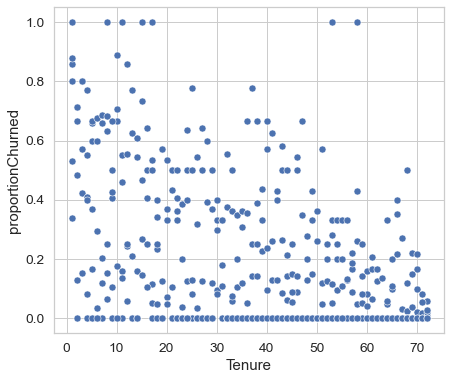

In [17]:
sns.set(rc = {'figure.figsize': (7, 6)},
        font_scale = 1.25) # increase text size on plots (e.g., axis labels)
sns.set_style('whitegrid')

sns.scatterplot(
    x = 'Tenure',
    y = 'proportionChurned',
    s = 50, # adjust point size
    data = plotDat)

From the satterplot, we learn that the customers who stayed with the company in a longer amount of time are more likely to stay. Next, let's fit a scatter plot with more detailed info related to internet service and senior citizenship.

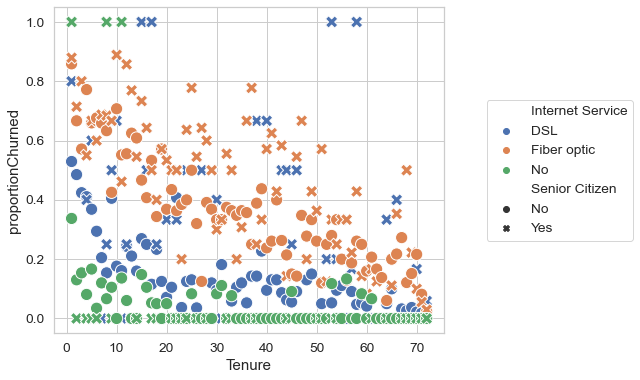

In [18]:
p = sns.scatterplot(
    x = 'Tenure',
    y = 'proportionChurned',
    s = 150,
    style = 'Senior Citizen', # add more variables(levels) 
    hue = 'Internet Service',
    data = plotDat)

p.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1) # move legend outside of plot

Given the info from the plot above, senior citizens are more likely to churn. When it comes to internet service type, customers who chose Fiber optic have higher chance to churn. 

As the points stayed too crowded, we can treat those features in separate plots to get a better understanding of their impacts on churn proportion.

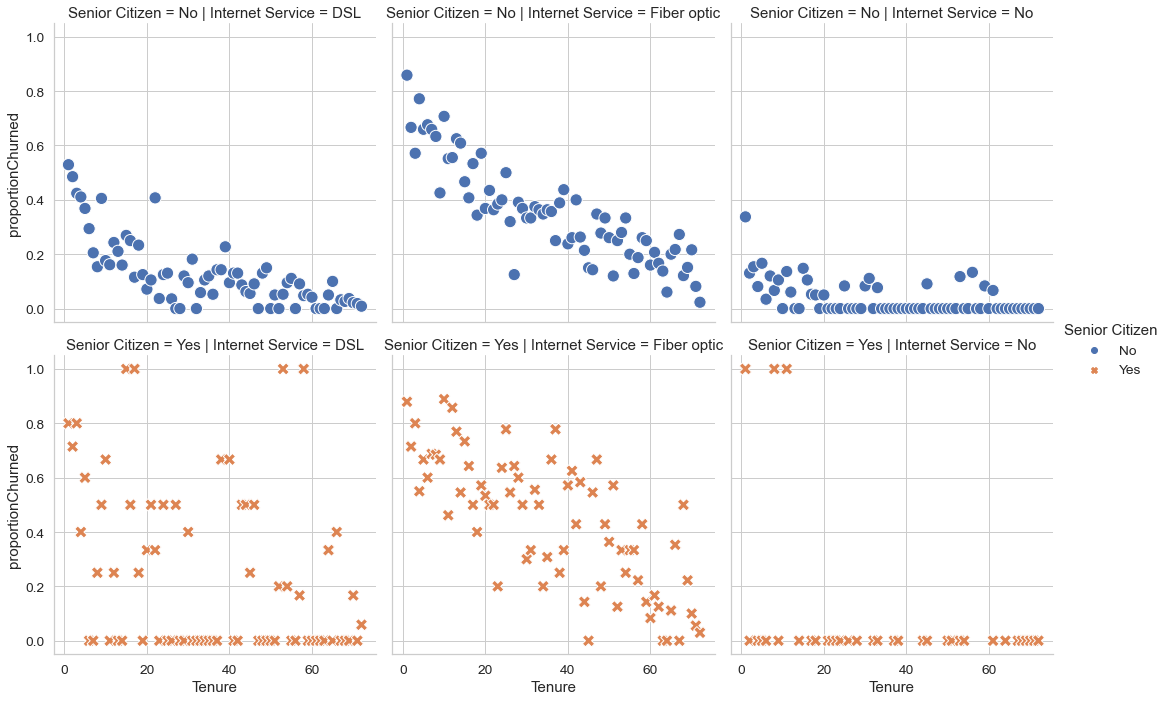

In [19]:
sns.relplot(
    x = 'Tenure',
    y = 'proportionChurned',
    s = 150,
    style = 'Senior Citizen',
    hue = 'Senior Citizen',
    col = 'Internet Service',
    row = 'Senior Citizen',
    kind = 'scatter',
    data = plotDat)

Here are some takeaways and questions:
1 Senior citizens have higher chance to leave the company. 

2 People apply for internet service are more likely to churn, in other words, churned customers are NOT satisfied with Telco internet service.


3 Compared to DSL, customers who apply for fiber optic internet channel are more like to leave. Simply put, DSL is old tech while Fiber optic internet, like Google fiber, is new tech. New technology will always be faster and efficient,  but why it has high opportunity to make customers leave? Our guess is that first, fiber users need to pay higher costs, second, this new tech is not mature so people may get disappointed about the service. 

This link explains the difference between DSL and fiber optic internet: 
    https://www.vssmonitoring.com/dsl-vs-fiber/
4. Customers who have short amount of time with Telco are more likely to churn.


---
### Supervised Machine Learning

 In this section, we will try to use machine learning to find the best possible model in a more automated fashion. Specifically, we will train multiple models using as many meaningful predictors as are available in an effort to find the optimal predictive model. 

We will use the scikit-learn ([sklearn](https://scikit-learn.org/stable/index.html)) package to conduct our machine learning analysis.

Before we get started, let's reset our data to make sure its pristine:

In [20]:
sns.set(rc = {'figure.figsize': (7, 6)},
        font_scale = 1.25) # increase text size on plots (e.g., axis labels)
sns.set_style('whitegrid')

display(rawDat.head(), rawDat.shape)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
11,361735,2889-FPWRM,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
12,777514,7569-NMZYQ,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
13,546231,9739-JLPQJ,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
14,778066,9788-HNGUT,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
15,535662,8879-XUAHX,No,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


(7032, 21)

#### Remove Irrelevent Variables

In [21]:
#Remove the 2 irrelevent columns: 'LoyaltyID' and 'CustomerID'
churnDat=rawDat.drop(['LoyaltyID','Customer ID'],axis =1 )
churnDat.head(5)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
11,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
12,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
13,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
14,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
15,No,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No


#### Identify Dependent Variable

Before we move ahead with our analysis, let's discuss the *dependent variable (DV)*. In this case, we'll be predicting churn states using 'Churn' column:

First, we should check class balance for the outcome variable (Churn):

In [22]:
churnDat.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

In [23]:
round(churnDat.groupby('Churn').size()/len(churnDat), 3)

Churn
No     0.734
Yes    0.266
dtype: float64

Looks like about 26.5% of the customers will churn.

#### Split Data
Let's create a training and holdout testing set (80%/20% of our data, respectively). We will use the training data to fit and evaluate model performance:


In [24]:
#split train and test
Train, Test = train_test_split(churnDat, 
                               stratify = churnDat.Churn,
                               test_size = 0.20, #ideal proportion
                               random_state = 345) #set.seed

In [25]:
#check the spliting percentage
display(len(Train),
        len(Test))

5625

1407

In [26]:
display(round(len(Train)/len(churnDat), 3), 
        round(len(Test)/len(churnDat), 3))

0.8

0.2

#### Class Balancing

While looking at our DV, we saw a clear class imbalance in our training and testing sets:

In [27]:
#check class balance in train data
display(Train.groupby('Churn').size())
round(Train.groupby('Churn').size()/len(Train), 3)

Churn
No     4130
Yes    1495
dtype: int64

Churn
No     0.734
Yes    0.266
dtype: float64

In [28]:
#check class balance in test data
display(Test.groupby('Churn').size())
round(Test.groupby('Churn').size()/len(Test), 3)

Churn
No     1033
Yes     374
dtype: int64

Churn
No     0.734
Yes    0.266
dtype: float64

Fix imbalance data: simply down sample the training data to balance based on the minority class (i.e., the class with fewer observations):
TRY SMOTE LATER !!!!!

In [29]:
np.random.seed(345) # to create reproducible results

maj_class = np.where(Train.Churn == 'No')[0]
min_class = np.where(Train.Churn == 'Yes')[0]

#randomly choose the sample from the maj class, number = min_class (400)
resample = np.random.choice(maj_class, size = len(min_class), replace = False)

#400 from maj_class and the rest 400 are min_class, DS: down sample
TrainDS = pd.concat([Train.iloc[min_class], Train.iloc[resample]])

TrainDS.shape

(2990, 19)

In [30]:
#check the result
display(TrainDS.groupby('Churn').size())
round(TrainDS.groupby('Churn').size()/len(TrainDS), 3)

Churn
No     1495
Yes    1495
dtype: int64

Churn
No     0.5
Yes    0.5
dtype: float64

#### Preprocessing

Let's do some basic preprocessing and checks to ensure our data will suit our models. First, check for missing values in data, which some models cannot handle:

drop the 11 rows without total charges

In [31]:
round(TrainDS.isna().sum()/len(TrainDS), 3)

Senior Citizen       0.0
Partner              0.0
Dependents           0.0
Tenure               0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn                0.0
dtype: float64

Next let's take care of dummy encoding (i.e., one hot encoding) the categorical data:

In [32]:
enc = OneHotEncoder(handle_unknown = 'ignore', 
                    sparse = False)

enc_raw_data_train = TrainDS.drop(columns = 'Churn').select_dtypes(include = ['object', 'category'])

enc_raw_data_train
enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

#create dummy
encoded_data_train.columns = enc.get_feature_names_out(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

TrainDS_Dm_Enc = pd.concat([TrainDS.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

TrainDS_Dm_Enc.head()

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
1953,50,71.05,3444.85,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2222,28,105.70,2979.50,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6650,1,51.25,51.25,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2348,27,101.25,2754.45,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7014,1,19.45,19.45,Yes,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Let's also do zero variance (ZV) removal just in case (although there shouldn't be any at this point):

In [33]:
selector = VarianceThreshold()

sel_raw_data_train = TrainDS_Dm_Enc.drop(columns = 'Churn')

selector = selector.fit(sel_raw_data_train)

selected_data_train = sel_raw_data_train.iloc[:, selector.get_support(indices = True)]

TrainDS_Dm_Enc_Sel = pd.concat([TrainDS_Dm_Enc.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_Dm_Enc_Sel.head()

,Churn,Tenure,Monthly Charges,Total Charges,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
1953,Yes,50,71.05,3444.85,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2222,Yes,28,105.70,2979.50,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6650,Yes,1,51.25,51.25,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2348,Yes,27,101.25,2754.45,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7014,Yes,1,19.45,19.45,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


 we need to apply all of the preprocessing we performed earlier using the training data to the testing data as well so that we can evaluate our models later in the script.

In [34]:
Test.head(5)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
6266,Yes,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
3916,No,Yes,Yes,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.90,1146.05,No
322,No,No,No,63,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),109.20,7049.75,No
2885,Yes,No,No,21,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.25,1973.75,Yes
2516,No,No,No,24,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.15,2494.65,No


In [35]:
#check missing value in test
round(Test.isna().sum()/len(Test), 3)

Senior Citizen       0.0
Partner              0.0
Dependents           0.0
Tenure               0.0
Phone Service        0.0
Multiple Lines       0.0
Internet Service     0.0
Online Security      0.0
Online Backup        0.0
Device Protection    0.0
Tech Support         0.0
Streaming TV         0.0
Streaming Movies     0.0
Contract             0.0
Paperless Billing    0.0
Payment Method       0.0
Monthly Charges      0.0
Total Charges        0.0
Churn                0.0
dtype: float64

In [36]:
# one hot encoding (for categorical data)

enc_raw_data_test = Test.drop(columns = 'Churn').select_dtypes(include = ['object', 'category'])

encoded_data_test = pd.DataFrame(enc.transform(enc_raw_data_test))

encoded_data_test.columns = enc.get_feature_names_out(enc_raw_data_test.columns)
encoded_data_test.index = enc_raw_data_test.index

Test_Enc = pd.concat([Test.drop(enc_raw_data_test.columns, axis = 1), encoded_data_test], axis = 1)

# final result
Test_Enc.head()

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
6266,2,44.70,93.70,Yes,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3916,53,20.90,1146.05,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
322,63,109.20,7049.75,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2885,21,94.25,1973.75,Yes,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2516,24,104.15,2494.65,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Model Fitting
We try to fit four models: Decision Tree, AdaBoost, Random Forest, Logesitic Regression, and see which works better for churn prediction.

To see what parameters a model supports, use the get_params method; for example, for a decision tree classifer, we can use:

In [37]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
X_train = TrainDS_Dm_Enc_Sel.drop(columns = 'Churn')
y_train = TrainDS_Dm_Enc_Sel.Churn

X_test = Test_Enc.drop(columns = 'Churn')
y_test = Test_Enc.Churn

pos_label = 'Yes'

# set up scoring metric
scoring_metric = 'balanced_accuracy'

# set up classifiers and tuning parameters
names = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Logistic Regression']
classifiers = [DecisionTreeClassifier(random_state = 345), 
               AdaBoostClassifier(random_state = 345), 
               RandomForestClassifier(random_state = 345), 
               LogisticRegression(random_state = 345, solver = 'liblinear')]
param_grids = [{'max_depth': [2, 3, 4, 5, 10, 15], 'criterion': ['gini', 'entropy']},
               {'n_estimators': [50, 100, 200]},
               {'max_depth': [2, 3, 4], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 200]}, 
               {'penalty': ['l1', 'l2']}]

# create empty lists for storing outcomes
models = []
preds = []
probs = []
BAs = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, # using (Stratified)KFold by default (with 5 folds)
                          scoring = scoring_metric,
                          n_jobs = -1) # use parallel processing
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 4: Decision Tree
Now working on model 2 of 4: AdaBoost
Now working on model 3 of 4: Random Forest
Now working on model 4 of 4: Logistic Regression
Finished!


Now we can create a DataFrame of our results, sorted by the highest (i.e., best) balanced accuracy/AUC score on the testing data:

In [39]:
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs, 
                        'TPR': TPRs, 
                        'FPR': FPRs, 
                        'Refit Time': timings}).sort_values(['AUC'], ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Accuracy', 'AUC']], 3))

,Classifier,Refit Time,Balanced Accuracy,AUC
1,AdaBoost,0.247,0.786,0.854
3,Logistic Regression,0.027,0.782,0.854
2,Random Forest,0.259,0.764,0.844
0,Decision Tree,0.012,0.754,0.812


We can also plot these data to see which model performed best (e.g., based on AUC), colored relative to model refit time (where lower, greener times are better):

/var/folders/39/xy2wkct15_7ch99_ny8_9jn00000gn/T/ipykernel_60347/1770620105.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(smRTs)


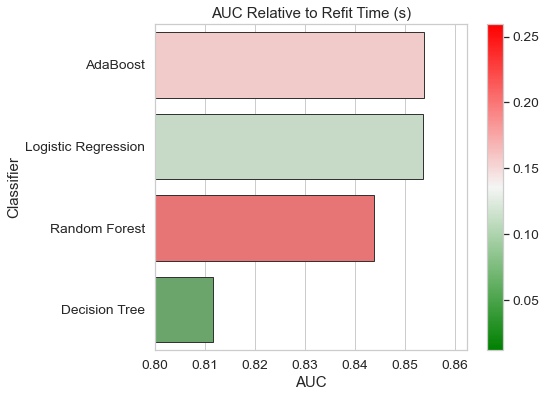

In [40]:
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()


We can also compare our models visually by plotting the receiver operating characteristic (ROC) curves for each model:

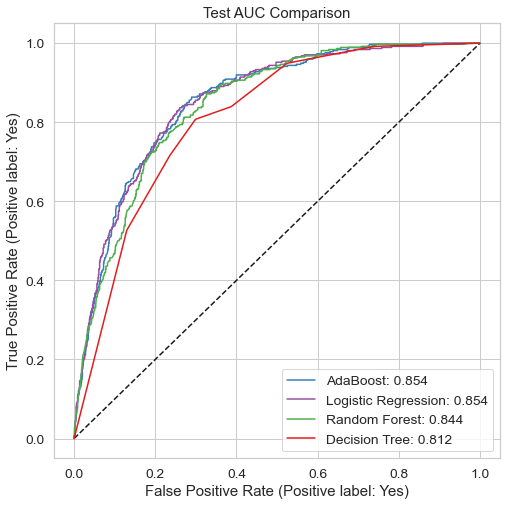

In [41]:
# defining a custom function for reuse later
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       X_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(results, X_test, y_test, title = 'Test AUC Comparison')

Overall these models all perform pretty similarly and are within rounding error of each other, but we'll focus on AdaBoost since it has the highest AUC.

Let's now pull out the index of our best model from our results (i.e., the first index from the DataFrame, since it was sorted by descending AUC):

In [42]:
best_index = results.index[0]
best_index

1

In [43]:
models[best_index].best_estimator_

AdaBoostClassifier(random_state=345)

#### Evaluation

#### Plot a confusion matrix for our top model:

In [44]:
# simple printed matrix
confusion_matrix(y_test, preds[best_index])

array([[745, 288],
       [ 56, 318]])

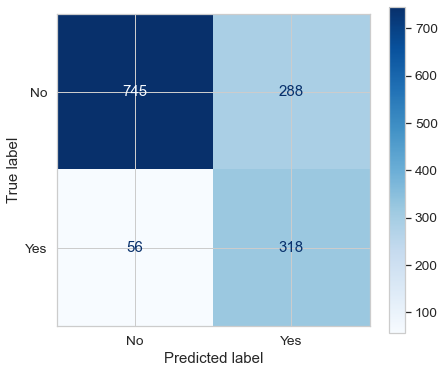

In [45]:
ConfusionMatrixDisplay.from_estimator(models[best_index], 
                                      X_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      values_format = 'd')

In [46]:
TP = 300  # True Positive
TN = 736# True Negative
FP = 74# False Positive
FN = 297  # False Negative

test_metrics = pd.DataFrame({
    'Sensitivity': [TP/(TP+FN)], 
    'Specificity': [TN/(TN+FP)], 
    'Positive Predictive Value': [TP/(TP+FP)], 
    'Negative Predictive Value': [TN/(TN+FN)], 
    'F1 Score': [TP/(TP+.5*(FP+FN))], 
    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)]})

test_metrics['Balanced Accuracy'] = np.mean([test_metrics.Sensitivity, test_metrics.Specificity])

round(test_metrics, 3)

,Sensitivity,Specificity,Positive Predictive Value,Negative Predictive Value,F1 Score,Accuracy,Balanced Accuracy
0,0.503,0.909,0.802,0.712,0.618,0.736,0.706


In [47]:
results.loc[best_index, ['Classifier', 'Balanced Accuracy']]

Classifier           AdaBoost
Balanced Accuracy    0.785734
Name: 1, dtype: object

To see a number of these evaluation metrics all at once,we generate a classification report:

In [48]:
print(classification_report(y_test, preds[best_index], digits = 3))

              precision    recall  f1-score   support

          No      0.930     0.721     0.812      1033
         Yes      0.525     0.850     0.649       374

    accuracy                          0.756      1407
   macro avg      0.727     0.786     0.731      1407
weighted avg      0.822     0.756     0.769      1407



#### Plot the important variables

<AxesSubplot:xlabel='importance', ylabel='feature'>

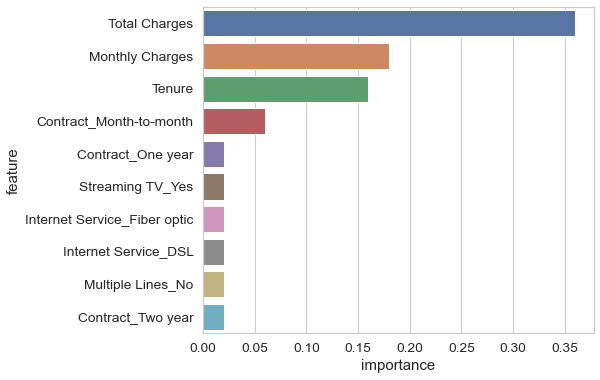

In [49]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
# for models with coefficients (directional) -- note: for interpretation and potential caveats, see https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10))

In [50]:
#var_imp = pd.DataFrame({
 #       'feature': X_test.columns, 
  #      'importance_abs': abs(models[results.index[1]].best_estimator_.coef_[0]), 
   #     'importance': models[results.index[1]].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
#sns.barplot(y = 'feature', 
 #           x = 'importance', 
  #          data = var_imp.head(10))

#### Plot Decision Trees

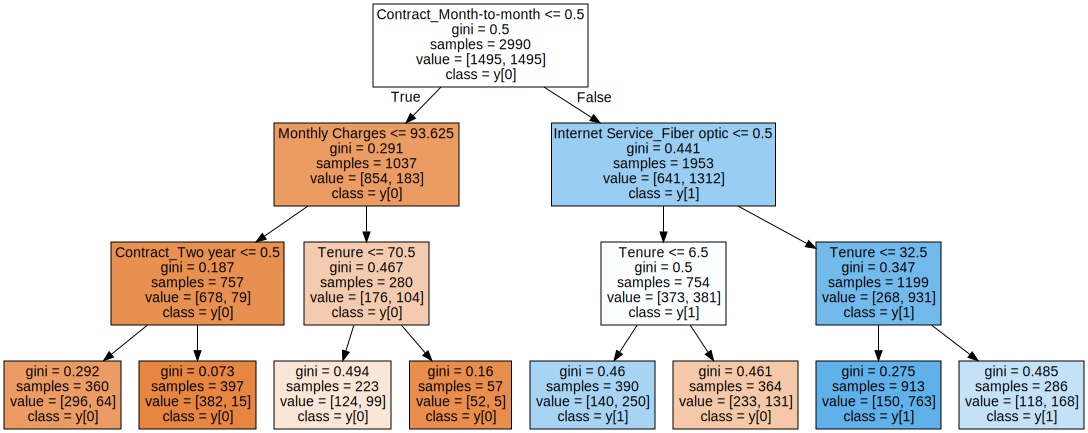

In [51]:

from IPython.display import SVG
from graphviz import Source

DecisionTree = models[results.query('Classifier == "Decision Tree"').index[0]].best_estimator_

graph = Source(tree.export_graphviz(DecisionTree, 
                                    out_file = None, 
                                    feature_names = X_test.columns, 
                                    class_names = True, 
                                    filled = True))

SVG(graph.pipe(format = 'svg'))

Find what the color means:

In [52]:
#rawDat.groupby('Contract').Churn.
t1 = rawDat.copy()
t1['BoolChurn'] = rawDat.Churn.replace({'No': 0, 'Yes': 1})
t1.groupby('Contract').BoolChurn.mean()

Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: BoolChurn, dtype: float64

#### Insights of decision tree
1. Blue means the likelihood to churn.
2. Senior Customers who have month-to-month contract are more likely to churn; they have high probabilty without online security assistent and have short service tenure and spend less in total.

## Other Insights and Recommendations

From business perspective, instead of focusing the group of people have made their mind to leave the company, we need to reach out to people who are hesitate to churn. So for the next step, we recommend the telecom company do more marketing event just targeting those people hesitate to churn. 


Here we ranked the probabilty to churn from high to low, define those with less than 30% of probability to churn as NoChurn(NC) and those with more than 40% but less than 60% probability to churn as MightChurn(MC). The reason why we marked those people with 40%~60% probability to churn (instead of, say, 60%~80% to churn) is that after considering the accuracy of our model, there is a possibility that although the predicted probability is less than 50%, the customer want to churn. In order to solve this problem, we just define the MC on a range between 40% and 60%.

In [53]:
# sort the customers based on probability to churn in test data
Test_tier1 =Test_Enc.copy()
Test_tier1['probs'] = probs[best_index] #use best model: adaboost
Test_tier1['preds'] = preds[best_index] 
Test_tier1['acc_or_not'] = Test_tier1['preds'] == Test_tier1.Churn
Test_tier1 = Test_tier1.sort_values('probs')
Test_tier1

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probs,preds,acc_or_not
60,71,113.65,8166.80,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No,True
30,72,115.05,8405.00,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.388393,No,True
48,72,114.05,8289.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No,True
51,72,113.10,8248.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.390135,No,True
23,72,114.05,8468.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.390135,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6454,1,74.40,74.40,Yes,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.520649,Yes,True
6339,1,84.60,84.60,No,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes,False
6252,1,95.45,95.45,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.521045,Yes,True
6228,1,100.25,100.25,Yes,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.521305,Yes,True


As the probability located near 0.5, we scale the probability from 0 to 1 which is easier for us to split the data.

In [54]:
#scale 
from sklearn.preprocessing import MinMaxScaler
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = MinMaxScaler()

# Scaling the probs column of the created dataFrame and storingthe result in Scaledprobs Column
Test_tier1[["Scaledprobs"]] = scaler.fit_transform(Test_tier1[["probs"]])
print(Test_tier1)

      Tenure  Monthly Charges  Total Charges Churn  Senior Citizen_No  \
60        71           113.65        8166.80    No                1.0   
30        72           115.05        8405.00    No                1.0   
48        72           114.05        8289.20    No                1.0   
51        72           113.10        8248.50    No                1.0   
23        72           114.05        8468.20    No                1.0   
...      ...              ...            ...   ...                ...   
6454       1            74.40          74.40   Yes                0.0   
6339       1            84.60          84.60    No                1.0   
6252       1            95.45          95.45   Yes                1.0   
6228       1           100.25         100.25   Yes                1.0   
6320       1            85.70          85.70   Yes                0.0   

      Senior Citizen_Yes  Partner_No  Partner_Yes  Dependents_No  \
60                   0.0         0.0          1.0      

In [55]:
Test_NC=Test_tier1.query('Scaledprobs < 0.3')
Test_NC['class']='NC'
Test_NC.head(10)

/var/folders/39/xy2wkct15_7ch99_ny8_9jn00000gn/T/ipykernel_60347/1294766034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_NC['class']='NC'


,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probs,preds,acc_or_not,Scaledprobs,class
60,71,113.65,8166.80,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.388393,No,True,0.000000,NC
30,72,115.05,8405.00,No,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.388393,No,True,0.000000,NC
48,72,114.05,8289.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.390135,No,True,0.012992,NC
51,72,113.10,8248.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.390135,No,True,0.012992,NC
23,72,114.05,8468.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.390135,No,True,0.012992,NC
40,72,114.85,8317.95,No,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.391454,No,True,0.022833,NC
50,70,115.15,8250.00,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.394657,No,True,0.046733,NC
47,71,116.05,8297.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,NC
20,72,116.85,8477.70,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,NC
22,72,115.80,8476.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,NC


In [56]:
Test_NC.shape

(13, 50)

In [57]:
# we have 14 customer in the lowest probability to churn

In [58]:
Test_MC=Test_tier1.query('Scaledprobs > .4' and 'Scaledprobs < .6')
Test_MC['class']='MC'
Test_MC.head(10)

/var/folders/39/xy2wkct15_7ch99_ny8_9jn00000gn/T/ipykernel_60347/4071629410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_MC['class']='MC'


,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probs,preds,acc_or_not,Scaledprobs,class
60,71,113.65,8166.80,No,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.388393,No,True,0.000000,MC
30,72,115.05,8405.00,No,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.388393,No,True,0.000000,MC
48,72,114.05,8289.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.390135,No,True,0.012992,MC
51,72,113.10,8248.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.390135,No,True,0.012992,MC
23,72,114.05,8468.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.390135,No,True,0.012992,MC
40,72,114.85,8317.95,No,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.391454,No,True,0.022833,MC
50,70,115.15,8250.00,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.394657,No,True,0.046733,MC
47,71,116.05,8297.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,MC
20,72,116.85,8477.70,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,MC
22,72,115.80,8476.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,MC


In [59]:
target_com=pd.concat([Test_NC, Test_MC])
target_com.tail(10)

,Tenure,Monthly Charges,Total Charges,Churn,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,probs,preds,acc_or_not,Scaledprobs,class
51,72,113.10,8248.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.390135,No,True,0.012992,MC
23,72,114.05,8468.20,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.390135,No,True,0.012992,MC
40,72,114.85,8317.95,No,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.391454,No,True,0.022833,MC
50,70,115.15,8250.00,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.394657,No,True,0.046733,MC
47,71,116.05,8297.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,MC
20,72,116.85,8477.70,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,MC
22,72,115.80,8476.50,No,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,MC
29,72,115.80,8424.90,No,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.396891,No,True,0.063399,MC
31,72,116.05,8404.90,No,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.398218,No,True,0.073299,MC
16,72,118.20,8547.15,No,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.398262,No,True,0.073632,MC


There is a trend that customers who churned were more likely to be on a Month-to-Month contract:

Next we use the for loop to check how do those two group of customers perform to different features.

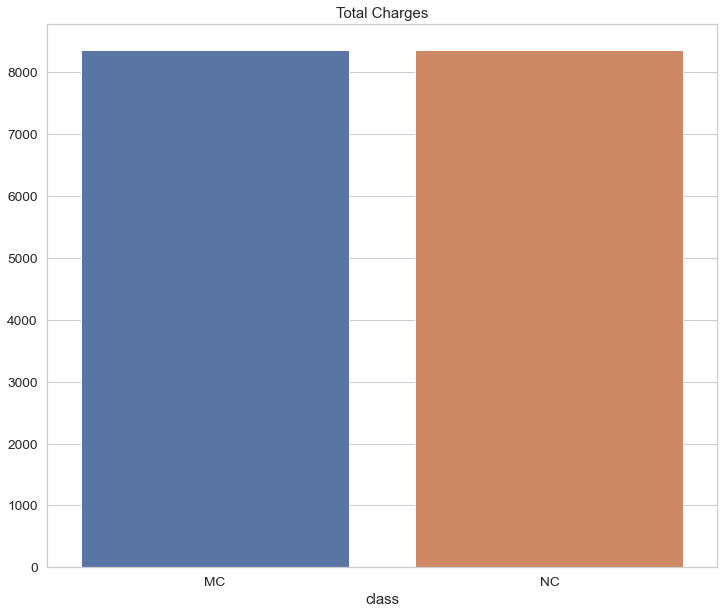

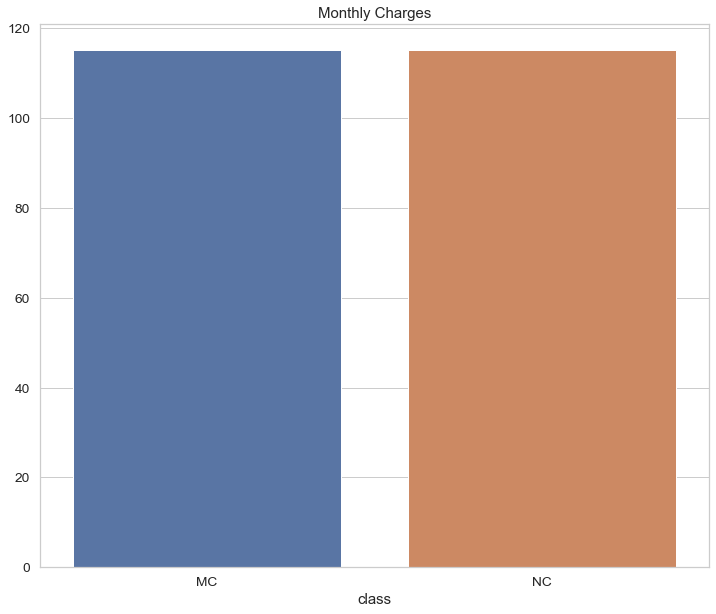

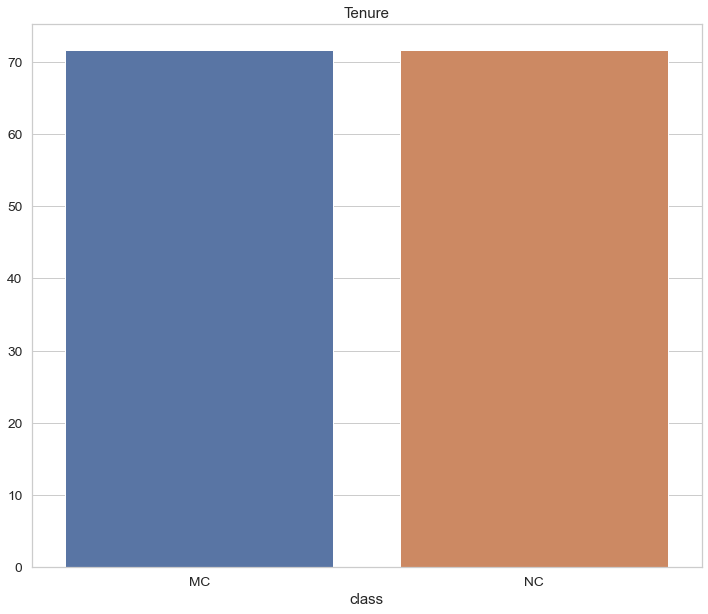

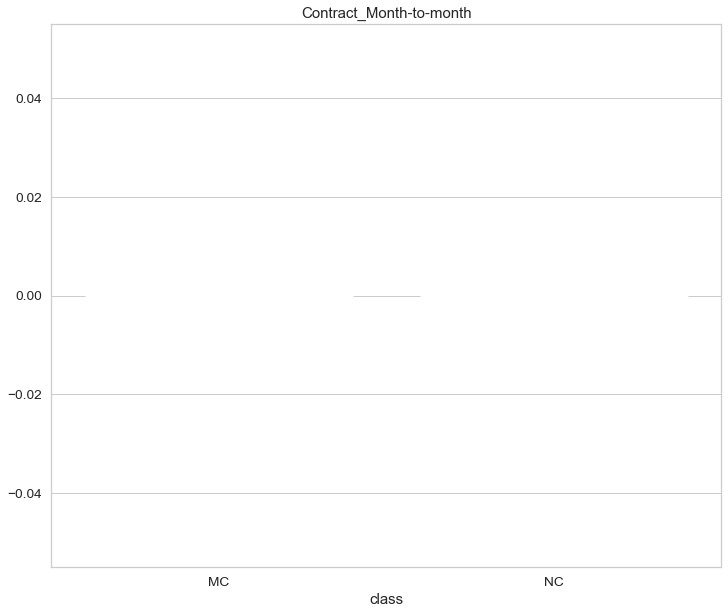

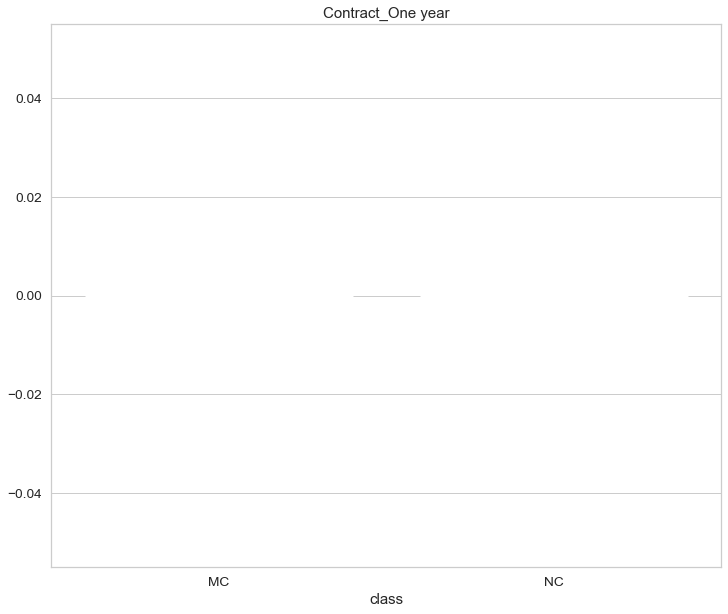

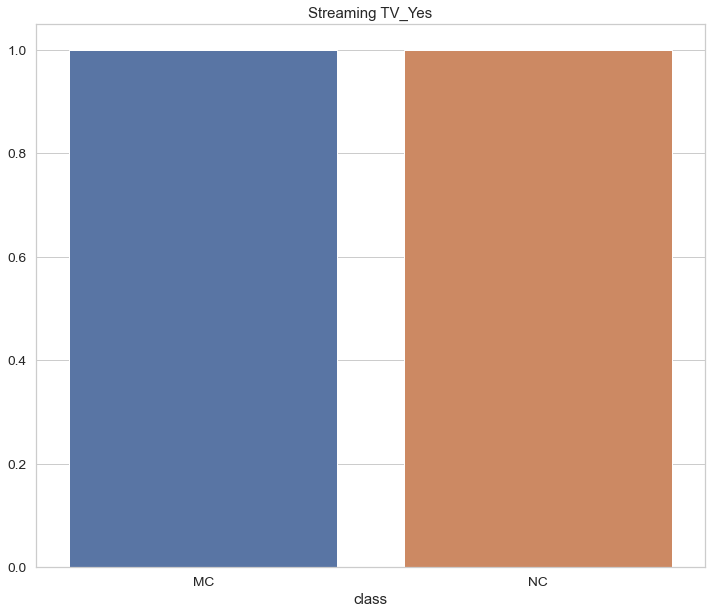

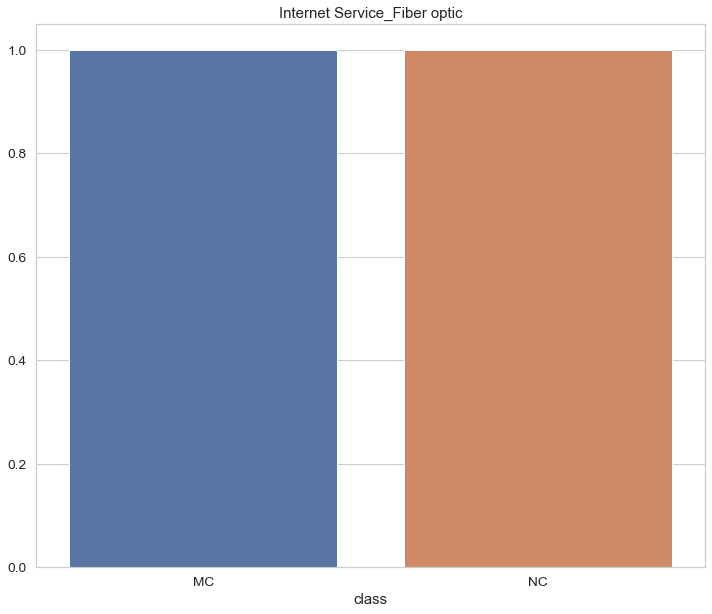

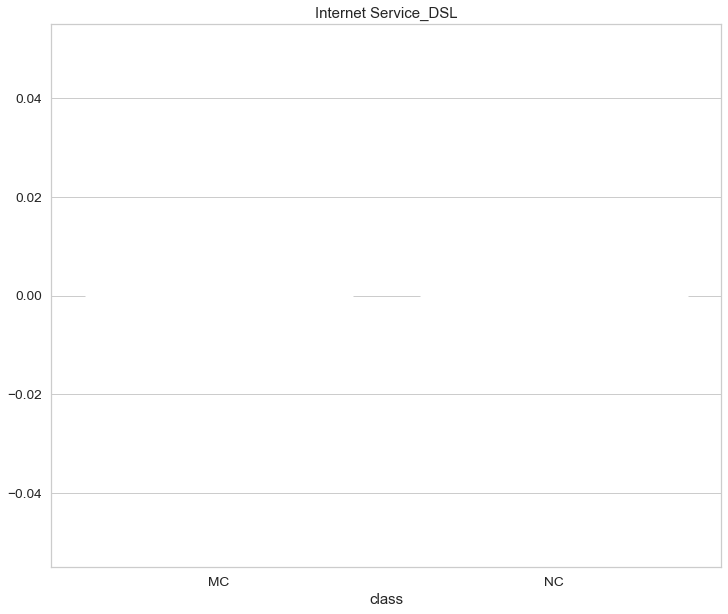

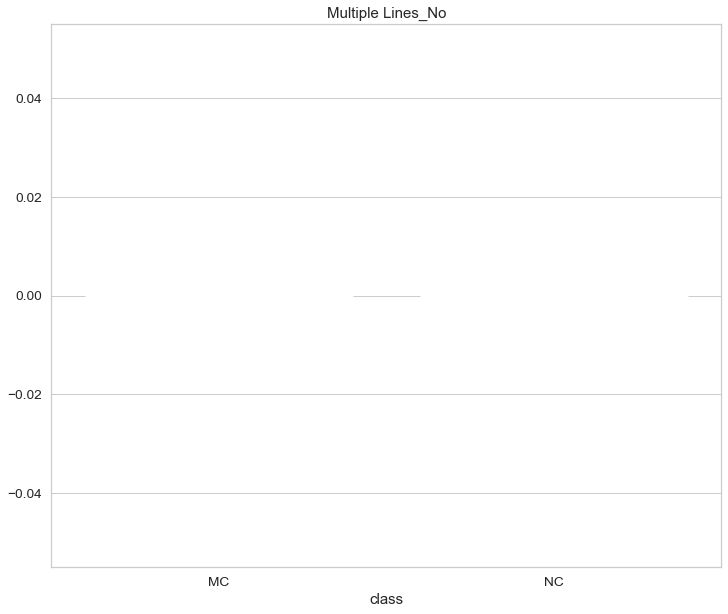

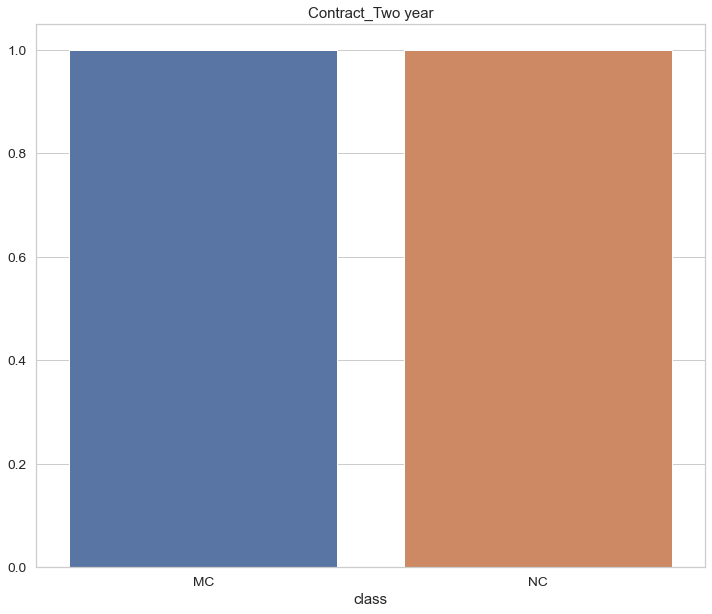

In [60]:
i=var_imp.feature.head(10)
for x in i:
  plt.figure(figsize = (12, 10))
  var=target_com.groupby('class')[x].sum()
  size=target_com.groupby('class')[x].size()
  var=var/size  
  sns.barplot(x=var.index,y=var.values).set_title(x)
  plt.show()


After analyzing the data of two groups, we found that:

1. NC have a higher Monthly charge and total charge (maybe because they love our service).
2. Neither NC nor MC use month-to-month contract. That means a longer contract can help us maintain the customer.
3. Although, generally speaking, senior people are more likely to churn, they are either stick with us (NC) or churn -- the proportion of senior citizens in MC group is low.
4. All people who have used our internet service DSL are somehow want to churn -- people are not satisfied with our internet service. 
5. The ratio of NC people who use Device protection, Streaming TV, Online Security, and Electronic Check is significantly higher than those of MC.


Next Step (Recommendations):
1. Improve our Internet Services: better quality, lower price, and etc.
2. Promote Device protection, Streaming TV, Online Security, and Electronic Check to MC customers.

